In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("IMDB Dataset.csv")

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.shape

(50000, 2)

In [9]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
df.duplicated().sum()

418

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.shape

(49582, 2)

# EDA


In [15]:
df['sentiment'].value_counts()

,count
sentiment,
positive,24884
negative,24698


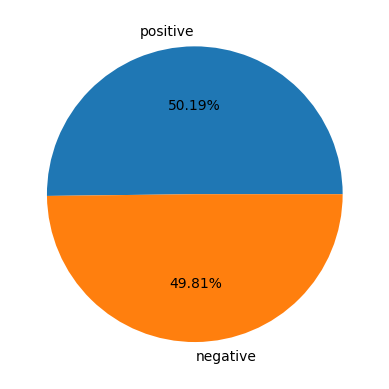

In [16]:
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].value_counts().index, autopct='%1.2f%%')
plt.show()

In [17]:
!pip install nltk

In [18]:
import nltk

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
df["num_characters"] = df["review"].apply(len)

In [22]:
df["num_words"] = df["review"].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df["num_sentences"] = df["review"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,49582.000000,49582.000000,49582.000000
mean,1310.568230,279.711226,10.741519
std,990.762238,208.167050,7.817026
min,32.000000,8.000000,1.000000
25%,699.000000,151.000000,6.000000
50%,971.000000,209.000000,9.000000
75%,1592.000000,340.000000,13.000000
max,13704.000000,2911.000000,282.000000


In [25]:
df[df["sentiment"]=="positive"][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,24884.000000,24884.000000,24884.000000
mean,1326.278532,280.644068,10.451736
std,1032.597204,214.626786,7.731403
min,65.000000,11.000000,1.000000
25%,692.000000,148.000000,6.000000
50%,969.000000,207.000000,9.000000
75%,1615.250000,343.000000,13.000000
max,13704.000000,2911.000000,282.000000


In [26]:
df[df["sentiment"]=="negative"][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,24698.000000,24698.000000,24698.000000
mean,1294.739615,278.771358,11.033484
std,946.501793,201.449273,7.891758
min,32.000000,8.000000,1.000000
25%,706.000000,153.000000,6.000000
50%,974.000000,211.000000,9.000000
75%,1568.000000,338.000000,13.000000
max,8969.000000,1936.000000,118.000000


In [94]:
df["sentiment"].replace({"positive":1,"negative":0},inplace=True)

<ipython-input-94-ce1779a1db9f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sentiment"].replace({"positive":1,"negative":0},inplace=True)


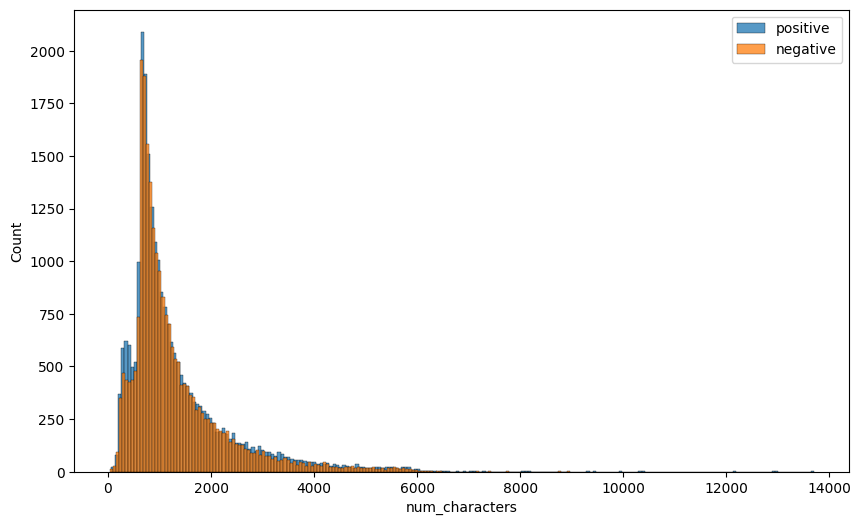

In [100]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["sentiment"]==1]["num_characters"])
sns.histplot(df[df["sentiment"]==0]["num_characters"])
plt.legend(["positive","negative"])
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

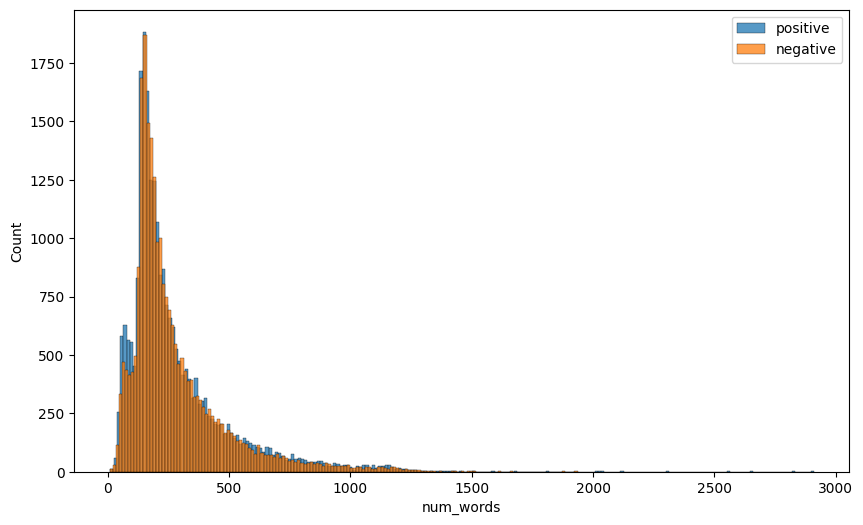

In [99]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["sentiment"]==1]["num_words"])
sns.histplot(df[df["sentiment"]==0]["num_words"])
plt.legend(["positive","negative"])
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

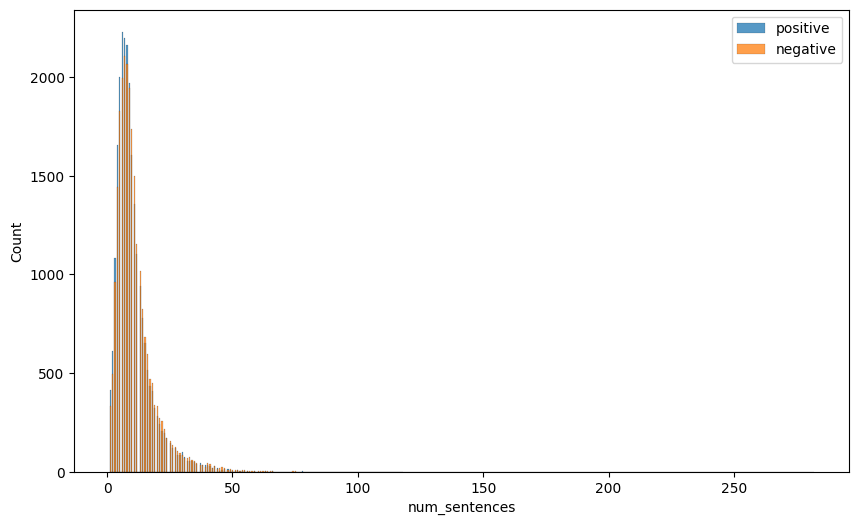

In [98]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["sentiment"]==1]["num_sentences"])
sns.histplot(df[df["sentiment"]==0]["num_sentences"])
plt.legend(["positive","negative"])
plt

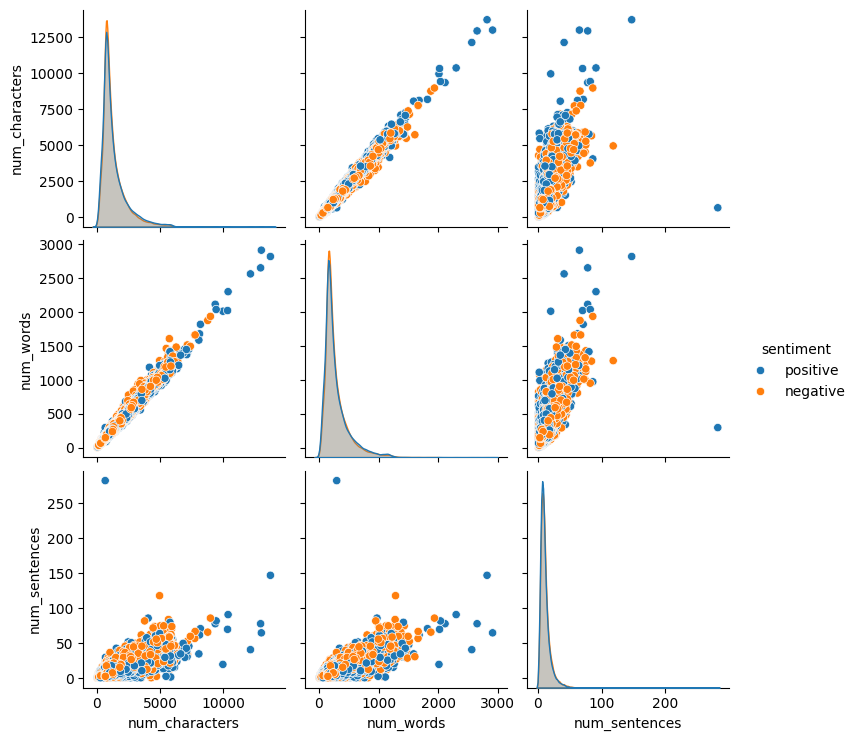

In [30]:
sns.pairplot(df,hue="sentiment")

<Axes: >

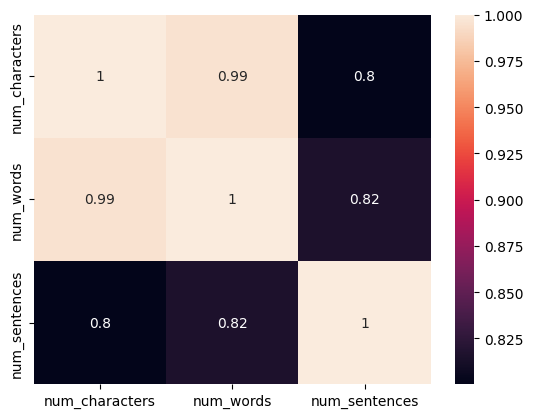

In [31]:
sns.heatmap(df.corr(numeric_only = True),annot=True)

# Text Cleaning
1. Remove htm
2. Remove special characters
3. Covercting Every thing to lower case
4. Removing Stop words
5. Stemming

In [34]:
import re
clean = re.compile('<.*?>')
re.sub(clean,"",df.iloc[2].review)

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [35]:
def clean_html(text):
  clean = re.compile('<.*?>')
  return re.sub(clean,"",text)

In [36]:
df["review"] = df["review"].apply(clean_html)

In [37]:
from nltk.corpus import stopwords
import string

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
def transform_text(input_text):
    # Convert text to lowercase
    text = input_text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Initialize a list to hold cleaned words
    cleaned_words = []

    # Remove non-alphanumeric tokens and stopwords
    for word in text:
        if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation:
            cleaned_words.append(word)
    text =  cleaned_words[:]
    cleaned_words.clear()
    for i in text:
        cleaned_words.append(ps.stem(i))
    return " ".join(cleaned_words)

In [41]:
transform_text(df["review"][10])

'phil alien one quirki film humour base around odd everyth rather actual first odd pretti funni movi progress find joke odd funni low budget film that never problem pretti interest charact eventu lost imagin film would appeal stoner current someth similar better tri brother anoth planet'

In [42]:
df["transformed_review"] = df["review"].apply(transform_text)

In [43]:
df.head()

,review,sentiment,num_characters,num_words,num_sentences,transformed_review
0,One of the other reviewers has mentioned that ...,1,1761,380,10,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. The filming tec...,1,998,201,7,wonder littl product film techniqu fashion giv...
2,I thought this was a wonderful way to spend ti...,1,926,205,4,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,748,175,6,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,9,petter mattei love time money visual stun film...


In [44]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.4 MB/s eta 0:00:00


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")

In [46]:
sentiment_positive_wc = wc.generate(df[df['sentiment'] == 1]["transformed_review"].str.cat(sep = " "))

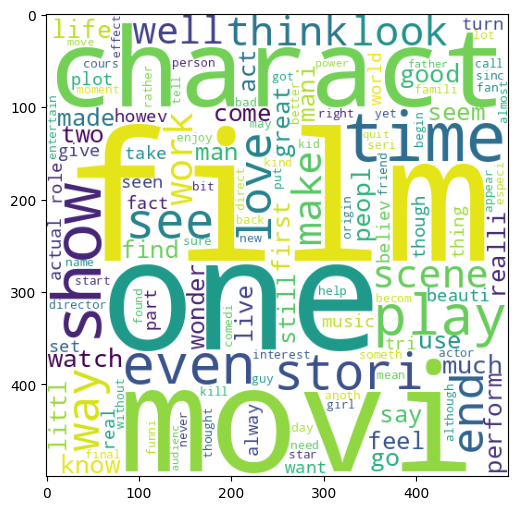

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(sentiment_positive_wc)

In [48]:
sentiment_negative_wc = wc.generate(df[df["sentiment"] == 0]["transformed_review"].str.cat(sep = " "))

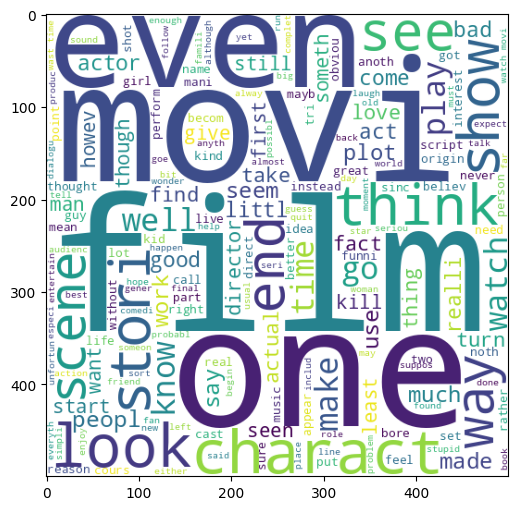

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(sentiment_negative_wc)

In [51]:
sentiment_negative_corpus = []
for review in df[df["sentiment"] == 0]["transformed_review"].tolist():
  for word in review.split():
    sentiment_negative_corpus.append(word)

In [52]:
len(sentiment_negative_corpus)

2770690

In [53]:
from collections import Counter
Counter(sentiment_negative_corpus).most_common(30)

[('movi', 55782),
 ('film', 42885),
 ('one', 25594),
 ('like', 23756),
 ('make', 15283),
 ('even', 15063),
 ('would', 15046),
 ('get', 14991),
 ('watch', 14458),
 ('time', 14303),
 ('good', 14283),
 ('bad', 14071),
 ('charact', 13866),
 ('see', 12769),
 ('realli', 12148),
 ('look', 11224),
 ('could', 11195),
 ('scene', 10974),
 ('stori', 10538),
 ('act', 10119),
 ('much', 9797),
 ('go', 9555),
 ('end', 9345),
 ('peopl', 9268),
 ('thing', 9210),
 ('think', 8892),
 ('show', 8457),
 ('made', 8324),
 ('say', 8181),
 ('plot', 8156)]

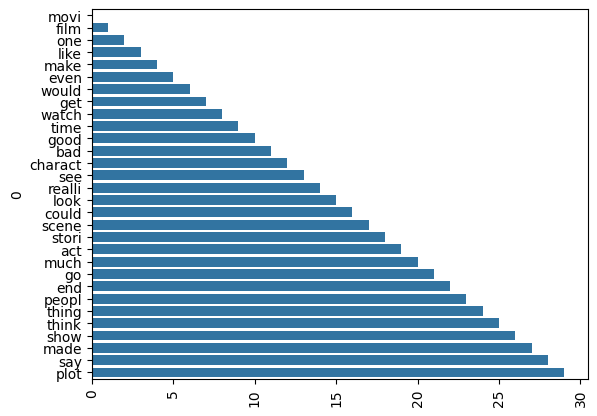

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(sentiment_negative_corpus).most_common(30))[0])
plt.xticks(rotation = "vertical")
plt.show()

In [55]:
sentiment_positive_corpus = []
for review in df[df["sentiment"] == 1]["transformed_review"].tolist():
    for word in review.split():
        sentiment_positive_corpus.append(word)

In [56]:
len(sentiment_positive_corpus)

2877744

In [57]:
from collections import Counter
Counter(sentiment_positive_corpus).most_common(30)

[('film', 49185),
 ('movi', 43271),
 ('one', 27029),
 ('like', 19900),
 ('time', 15538),
 ('see', 14680),
 ('good', 14620),
 ('stori', 13688),
 ('charact', 13641),
 ('make', 13123),
 ('great', 12813),
 ('get', 12527),
 ('watch', 12500),
 ('love', 12065),
 ('well', 11395),
 ('would', 11193),
 ('show', 10808),
 ('realli', 10661),
 ('also', 10558),
 ('play', 9857),
 ('scene', 9729),
 ('even', 9714),
 ('much', 9008),
 ('end', 8877),
 ('first', 8857),
 ('peopl', 8660),
 ('way', 8546),
 ('think', 8366),
 ('best', 8310),
 ('go', 8042)]

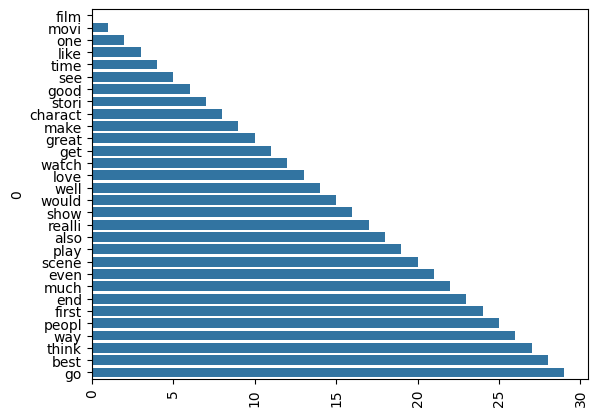

In [58]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(sentiment_positive_corpus).most_common(30))[0])
plt.xticks(rotation = "vertical")
plt.show()

# Model Building

In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [61]:
cv = CountVectorizer()

In [62]:
X = cv.fit_transform(df['transformed_review']).toarray()

In [63]:
X.shape

(49582, 70672)

In [64]:
y = df['sentiment'].values

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
print(gnb.fit(x_train,y_train))
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

GaussianNB()
0.6346402065182317
[[5177  991]
 [3538 2690]]
0.7307796794349362


In [69]:
print(mnb.fit(x_train,y_train))
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

MultinomialNB()
0.8504356243949661
[[5352  816]
 [1038 5190]]
0.8641358641358642


In [70]:
print(bnb.fit(x_train,y_train))
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

BernoulliNB()
0.8465634075508228
[[5382  786]
 [1116 5112]]
0.866734486266531


In [71]:
tfidf = TfidfVectorizer()
TfidfVectorizer()

TfidfVectorizer()

In [72]:
x2 = tfidf.fit_transform(df['transformed_review']).toarray()
y2 = df['sentiment'].values

In [73]:
x1_train, x1_test , y1_train, y1_test = train_test_split(x2,y2,test_size = 0.25, random_state = 42)

In [74]:
print(gnb.fit(x1_train,y1_train))
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))

print( "******************************\n")

print(mnb.fit(x1_train,y1_train))
y_pred2 = mnb.predict(x1_test)
print(accuracy_score(y1_test,y_pred2))
print(confusion_matrix(y1_test,y_pred2))
print(precision_score(y1_test,y_pred2))

print( "******************************\n")

print(bnb.fit(x1_train,y1_train))
y_pred3 = bnb.predict(x1_test)
print(accuracy_score(y1_test,y_pred3))
print(confusion_matrix(y1_test,y_pred3))
print(precision_score(y1_test,y_pred3))

GaussianNB()
0.7223297838012263
[[4502 1666]
 [1776 4452]]
0.7276887871853547
******************************

MultinomialNB()
0.8570506615037109
[[5326  842]
 [ 930 5298]]
0.8628664495114007
******************************

BernoulliNB()
0.8465634075508228
[[5382  786]
 [1116 5112]]
0.866734486266531


In [75]:
tfidf2 = TfidfVectorizer()
TfidfVectorizer(max_features = 3000)

TfidfVectorizer(max_features=3000)

In [76]:
x3 = tfidf2.fit_transform(df['transformed_review']).toarray()
y3 = df['sentiment'].values

In [77]:
x2_train, x2_test , y2_train, y2_test = train_test_split(x3,y3,test_size = 0.25, random_state = 42)

In [78]:
print(gnb.fit(x2_train,y2_train))
y_pred1 = gnb.predict(x2_test)
print(accuracy_score(y2_test,y_pred1))
print(confusion_matrix(y2_test,y_pred1))
print(precision_score(y2_test,y_pred1))

print( "******************************\n")

print(mnb.fit(x2_train,y2_train))
y_pred2 = mnb.predict(x2_test)
print(accuracy_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))

print( "******************************\n")

print(bnb.fit(x2_train,y2_train))
y_pred3 = bnb.predict(x2_test)
print(accuracy_score(y2_test,y_pred3))
print(confusion_matrix(y2_test,y_pred3))
print(precision_score(y2_test,y_pred3))

GaussianNB()
0.638028396256857
[[4914 1254]
 [3233 2995]]
0.7048717345257708
******************************

MultinomialNB()
0.8570506615037109
[[5326  842]
 [ 930 5298]]
0.8628664495114007
******************************

BernoulliNB()
0.8465634075508228
[[5382  786]
 [1116 5112]]
0.866734486266531


In [79]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))